# Shrinkage methods: Ridge and LASSO

## Ridge Regression

Ridge regression shrinks coefficients, $\hat{\beta}$, by penalizing the residual sum of squares with a Lagrange multiplier, $\lambda$. 


$$
\hat{\beta}^{ridge} = \operatorname*{arg\,min}_\beta \bigg\{ \sum_{i=1}^{N}\big(y_i - \beta_0 - \sum_{j=1}^{p} x_{ij}\beta_j\big)^2 +\lambda \sum_{j=1}^{p} \beta^2_j\bigg\}
$$

Written as the optimization,



$$
\hat{\beta}^{ridge} = \operatorname*{arg\,min}_\beta \sum_{i=1}^{N}\big(y_i - \beta_0 - \sum_{j=1}^{p} x_{ij}\beta_j\big)^2,\\
\sum_{j=1}^{p} \beta^2_j\leq t
$$

for some $t>0$.
In matrix notation, the lagrangian is written as, 

$$
L(X,t,\lambda^*,\beta ) =\|Y - X\beta\|_2^2 + \lambda^*(\|\beta\|_2^2 - t)
$$

where $\|\bullet\|$ denotes the $L_2$ norm. The optimal solution for the estimator, $\hat{\beta}^{ridge}$, is proved with Karush-Kuhn-Tucker (KKT) conditions,
$\nabla_{\beta} L(X,c,\lambda^*,\beta ) = 0$ (stationarity) and $\lambda^*(\|\beta(\lambda^*)\|_2^2 - t) = 0$ (Complementary slackness
). With the KKT conditions, 

$$
-2X^T(Y-X\beta) + 2t\beta = 0,\\
\lambda^*(\|\beta(\lambda^*)\|_2^2 - t) = 0
$$

Both conditions are satisfied if $\lambda^* = \lambda$ and $t = \lambda^*\|\beta(\lambda^*)\|_2^2$. 

The solution to the ridge estimator is solved similar to linear regression.

$$
RSS = (Y-\beta X)^T(Y-\beta X) - \lambda \beta^T \beta
$$

where the solution is 

$$
\hat{\beta}^{ridge} = (X^TX - \lambda I)^{-1} X^T Y
$$

In [238]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})


import warnings
warnings.filterwarnings("ignore")



#testing with the prostate dataset
df = pd.read_csv('.//prostate.data',sep='\s+')
df.head()


#split train and test
df_train = df.loc[df['train'] == 'T']
df_test = df.loc[df['train'] == 'F']
#drop train column
df_train = df_train.drop(['train'],axis=1)
df_test = df_test.drop(['train'],axis=1)
x_train = df_train[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']].to_numpy()
y_train = df_train[['lpsa']].to_numpy()
x_test = df_test[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']].to_numpy()
y_test = df_test[['lpsa']].to_numpy()
predictors = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']


#for ridge regression standardize the predictors
x_train = (x_train - np.mean(x_train,axis=0))/np.std(x_train,axis=0)
x_test = (x_test - np.mean(x_test,axis=0))/np.std(x_test,axis=0)

y_train = (y_train - np.mean(y_train,axis=0))/np.std(y_train,axis=0)
y_train = (y_train - np.mean(y_train,axis=0))/np.std(y_train,axis=0)

In [241]:
#Method 1 Use Coordinate descent to sovle for betas 
import copy
beta = np.zeros((x_train.shape[1],1))

#Lasso coefficient
def soft_threshold_l1(t : float,_lambda : float) -> float:
    m = abs(t)
    if t >= 0 and m > _lambda:
        return m - _lambda
    elif t < 0 and m > _lambda:
        return _lambda - m
    else:
        return 0.0

#Ridge coefficient    
def soft_threshold_l2(t : float,_lambda : float) -> float:
    return t / (1.0+_lambda)
    

#lambdas
lambda_tot = 200
lambda_sol = np.zeros((lambda_tot,beta.shape[0]))
lambda_range = np.arange(0,1,1.0/lambda_tot)[::-1]


for k,lval in enumerate(lambda_range):
#Iterative for lambda
    r = y_train - x_train @ beta
    for i in range(0,100):
        #iterate over betas
        for j in range(beta.shape[0]):
            temp_beta = copy.deepcopy(beta)
            temp_beta[j] = 0.0
            r = y_train - x_train @ temp_beta
            xtx = np.sum(x_train[:,j]**2)
            betaj = (1/xtx) * (x_train[:,j].T @ r)
            beta[j] = soft_threshold_l1(betaj[0],lval)

    lambda_sol[k] = beta.T
    

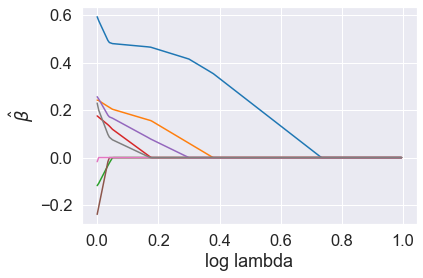

In [248]:
fig, ax = plt.subplots()
x = lambda_range
for m in range(lambda_sol.shape[1]):
    ax.plot(x, lambda_sol[:,m])
    ax.set_xlabel("log lambda")
    ax.set_ylabel(r"$\hat{\beta}$")

In [249]:
x

array([0.995, 0.99 , 0.985, 0.98 , 0.975, 0.97 , 0.965, 0.96 , 0.955,
       0.95 , 0.945, 0.94 , 0.935, 0.93 , 0.925, 0.92 , 0.915, 0.91 ,
       0.905, 0.9  , 0.895, 0.89 , 0.885, 0.88 , 0.875, 0.87 , 0.865,
       0.86 , 0.855, 0.85 , 0.845, 0.84 , 0.835, 0.83 , 0.825, 0.82 ,
       0.815, 0.81 , 0.805, 0.8  , 0.795, 0.79 , 0.785, 0.78 , 0.775,
       0.77 , 0.765, 0.76 , 0.755, 0.75 , 0.745, 0.74 , 0.735, 0.73 ,
       0.725, 0.72 , 0.715, 0.71 , 0.705, 0.7  , 0.695, 0.69 , 0.685,
       0.68 , 0.675, 0.67 , 0.665, 0.66 , 0.655, 0.65 , 0.645, 0.64 ,
       0.635, 0.63 , 0.625, 0.62 , 0.615, 0.61 , 0.605, 0.6  , 0.595,
       0.59 , 0.585, 0.58 , 0.575, 0.57 , 0.565, 0.56 , 0.555, 0.55 ,
       0.545, 0.54 , 0.535, 0.53 , 0.525, 0.52 , 0.515, 0.51 , 0.505,
       0.5  , 0.495, 0.49 , 0.485, 0.48 , 0.475, 0.47 , 0.465, 0.46 ,
       0.455, 0.45 , 0.445, 0.44 , 0.435, 0.43 , 0.425, 0.42 , 0.415,
       0.41 , 0.405, 0.4  , 0.395, 0.39 , 0.385, 0.38 , 0.375, 0.37 ,
       0.365, 0.36 ,